In [4]:
#중복
import pandas as pd 
import numpy as np
arr = np.array([1,2,1,2,2,3,3,3])
data= arr.reshape(4,2)
df= pd.DataFrame(data,columns=['a','b'])
df

,a,b
0,1,2
1,1,2
2,2,3
3,3,3


In [7]:
df1=df.copy()
df1.drop_duplicates()

,a,b
0,1,2
2,2,3
3,3,3


In [12]:
# 특정 컬럼 기준으로 중복 행 삭제(a컬럼기준)
df2=df.copy()
df2.drop_duplicates(subset=['b'])

,a,b
0,1,2
2,2,3


In [13]:
# 중복된 값중 (원래앞에값이 남는데) 뒤에값을 남기기
df3=df.copy()
df3.drop_duplicates(subset=['b'],keep='last')

,a,b
1,1,2
3,3,3


In [134]:
# 컬럼 이름 변경 
import seaborn as sns

titanic= sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [61]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [62]:
# 특정컬럼 값 바꾸기 (여자 남자 바꾸기)
titanic['sex']=titanic.sex.replace({'male':0,'female':1})
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,1,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,1,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,0,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [86]:
# 열 이름 변경  sex->gender / age->age_cat
titanic.rename(columns={'sex':'gender','age':'age_cat','c_class':'c_level'},inplace=True)
titanic.head()

,survived,pclass,gender,c_level
0,0,3,0,Third
1,1,1,1,First
2,1,3,1,Third
3,1,1,1,First
4,0,3,0,Third


In [87]:
# 컬럼이름 다 대문자로 바꾸기 

# titanic.columns = map(lambda x : str(x).upper(),titanic.columns)

titanic.rename(columns=str.upper, inplace=True)  #소문자로 하려면 str.lower
titanic.head()

,SURVIVED,PCLASS,GENDER,C_LEVEL
0,0,3,0,Third
1,1,1,1,First
2,1,3,1,Third
3,1,1,1,First
4,0,3,0,Third


In [88]:
titanic.rename(str.upper, axis='columns').head(3)  


,SURVIVED,PCLASS,GENDER,C_LEVEL
0,0,3,0,Third
1,1,1,1,First
2,1,3,1,Third


In [89]:
# titanic.rename(str.upper, axis='columns').head(3)  
# titanic
titanic.rename(columns=str.lower, inplace=True)  #소문자로 하려면 str.lower
titanic.head()

,survived,pclass,gender,c_level
0,0,3,0,Third
1,1,1,1,First
2,1,3,1,Third
3,1,1,1,First
4,0,3,0,Third


In [90]:
# 컬럼선택 'survived','pclass','gender','class'
titanic = titanic[['survived','pclass','gender','c_level']]
titanic.head()


,survived,pclass,gender,c_level
0,0,3,0,Third
1,1,1,1,First
2,1,3,1,Third
3,1,1,1,First
4,0,3,0,Third


In [118]:
# 컬럼 순서 변경 'pclass','gender','age_cat','survived'
df = titanic[['pclass','gender','c_level','survived']]
df


,pclass,gender,c_level,survived
0,3,0,Third,0
1,1,1,First,1
2,3,1,Third,1
3,1,1,First,1
4,3,0,Third,0
...,...,...,...,...
886,2,0,Second,0
887,1,1,First,1
888,3,1,Third,0
889,1,0,First,1


In [120]:
import warnings
warnings.filterwarnings('ignore')
df['gender'].replace([1,0],['female','male'],inplace=True)
df.head()

,pclass,gender,c_level,survived
0,3,male,Third,0
1,1,female,First,1
2,3,female,Third,1
3,1,female,First,1
4,3,male,Third,0


In [121]:
# 인코딩 - LabelEncoder
# 하나의 컬럼에서 처리하는거? 
# 레이블 인코더는 클래스여서 객체만들어줘야함 

from sklearn.preprocessing import LabelEncoder 

le= LabelEncoder()
features= ['gender','c_level']

for feature in features:
    df[feature]= le.fit_transform(df[feature])  #객체.fit_transform :인코딩해주는거 (fit:준비-tr:실행)
df.head()

    
# 기계학습시킬 때도 fit 씀 ㅎㅎ

,pclass,gender,c_level,survived
0,3,1,2,0
1,1,0,0,1
2,3,0,2,1
3,1,0,0,1
4,3,1,2,0


In [122]:
df.gender.value_counts()

1    577
0    314
Name: gender, dtype: int64

In [123]:
df.c_level.value_counts()

2    491
0    216
1    184
Name: c_level, dtype: int64

In [137]:
df=titanic[['sex','class']]
df1=df.copy()
df1.rename(columns={'class':'c_level'},inplace=True)
df1.head()

,sex,c_level
0,male,Third
1,female,First
2,female,Third
3,female,First
4,male,Third


In [138]:
# 인코딩 - OnHotEncoder -
#희소행렬 : 해당되는건 1번 해당안되는건0번 ( 해당안되는건 모두 0번)

pd.get_dummies(df1).head()

,sex_female,sex_male,c_level_First,c_level_Second,c_level_Third
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,1,0,0
4,0,1,0,0,1


In [151]:
from sklearn.datasets import load_boston  #주택가격 관련 데이터

boston= load_boston()
print(boston.keys())
boston.target
boston.DESCR  #print(boston.DESCR)으로하면 보기좋게나옴 
print(boston.feature_names)

df_boston= pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['target']= boston.target   # data에는 독립변수 target에는 종속변수 있어서
df_boston.head()

# 데이터프레임에는 종속변수도 있어야해서 target도 있어야함 !  

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# data : 데이터셋의 정보가 numpy.ndarray 형태로 저장
# target : 레이블 정보
# feature_names : 데이터셋의 컬럼정보
# DESCR : 데이터셋 설명
# filename : 해당 데이터셋의 저장 위치 정보 표시]


In [150]:
df_boston.info()

#null값없이 깨끗한 데이터... 원래 이런ㄱㅓ 보기힘들당 ~ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [152]:
# 스케일링- 정규화
# 0과1사이의 선별적인 숫자 골라내서 .변형하는거? 
# 평균0 표준편차1 -> 가우시안 (표준전개분포) 
# 이 스케일로 스케일링하는게 표준화 

from sklearn.preprocessing import MinMaxScaler 

scaler= MinMaxScaler()  #객체만들기

# df_boston['RM']= scaler.fit_transform(df_boston['RM'])
df_boston['RM']= scaler.fit_transform(df_boston[['RM']])
df_boston.head()

# df_boston - RM컬럼을스케일링해서 다시 거기에 집어넣기

# 스케일링해서 0-1사이 숫자로 바뀌니까... 값이 저렇게 바뀐다~

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,0.577505,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,0.547998,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,0.694386,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,0.658555,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,0.687105,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [153]:
df_boston.RM.mean()

0.5218690146295801

In [154]:
# 스케일링- 표준화
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
df_boston['INDUS']= scaler.fit_transform(df_boston[['INDUS']])
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,-1.287909,0.0,0.538,0.577505,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,-0.593381,0.0,0.469,0.547998,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,-0.593381,0.0,0.469,0.694386,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,-1.306878,0.0,0.458,0.658555,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,-1.306878,0.0,0.458,0.687105,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [157]:
# 평균
df_boston.INDUS.mean()

# 0이나옴 e^-16 : 소수점 16개

2.1063519834785578e-16

In [158]:
# 표준편차
df_boston.INDUS.std()

# 1이나옴 ~ 

1.0009896093465716

<AxesSubplot:ylabel='Density'>

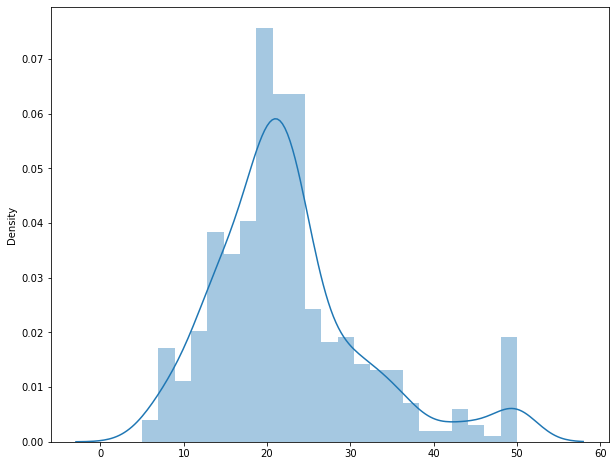

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.distplot(df_boston[['target']])

# 타겟의 분포 - 정규분포는 아님 (왜곡되어있음 ~ )

<AxesSubplot:ylabel='Density'>

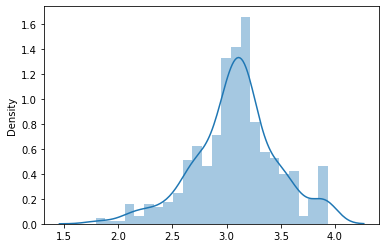

In [160]:
# 로그 변환 : 정규분포에 가깝게 하기 위한 과정
import numpy as np
df_boston['target']=np.log1p(df_boston[['target']]) #로그 변환

sns.distplot(df_boston[['target']])

In [ ]:
# 지수: 기하급수적으로 느는ㄴ것
# 로그: 갈수록 완만해짐

In [161]:
# 로그 변환 환원

df_boston['target']= np.expm1(df_boston[['target']])
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,-1.287909,0.0,0.538,0.577505,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,-0.593381,0.0,0.469,0.547998,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,-0.593381,0.0,0.469,0.694386,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,-1.306878,0.0,0.458,0.658555,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,-1.306878,0.0,0.458,0.687105,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 그룹 연산 

- 복잡한 데이터를 어떤 기준에 따라 여러 그룹으로 나누어서 관찰할 수 있으며 이런 방식으로 분할 처리하는 것을 그룹 연산이라 함.
- 그룹 연산은 데이터를 집계, 변환, 필터링하는데 효율적이며 판다스 groupby()메소드를 사용하
- 그룹 객체 만들기(분할)
- 그룹 연산 메소드 (적용-결합)

In [1]:
import pandas as pd
import seaborn as sns

#타이타닉데이터셋에서 age, sex등 5개 열을 선택하여 테이터프레임 만들기
titanic= sns.load_dataset('titanic')
df= titanic.loc[:,['age','sex','class','fare','survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [3]:
# # class를 설정 
# df['class'].value_counts


<bound method IndexOpsMixin.value_counts of 0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 891, dtype: category
Categories (3, object): ['First', 'Second', 'Third']>

In [12]:
# # class 설정
# data= df['class']
# # type(data)
# data.value_counts()

# # df.class.value.counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [15]:
# 그냥 class 이름을 바꾸기 
df.rename(columns={'class':'c_level'}, inplace=True)
df.c_level.value_counts()

Third     491
First     216
Second    184
Name: c_level, dtype: int64

In [18]:
# import keyboard
# print(keyboard_kwlist)
# # 예약어확인 

In [26]:
# class기준으로 그룹핑

len(df)
grouped=df.groupby(['c_level'])
print(grouped)  # 그룹해서 멀할지 안정해줘서 그룹한 객체만 나온다..~

In [27]:
list(grouped)

[('First',
        age     sex c_level     fare  survived
  1    38.0  female   First  71.2833         1
  3    35.0  female   First  53.1000         1
  6    54.0    male   First  51.8625         0
  11   58.0  female   First  26.5500         1
  23   28.0    male   First  35.5000         1
  ..    ...     ...     ...      ...       ...
  871  47.0  female   First  52.5542         1
  872  33.0    male   First   5.0000         0
  879  56.0  female   First  83.1583         1
  887  19.0  female   First  30.0000         1
  889  26.0    male   First  30.0000         1
  
  [216 rows x 5 columns]),
 ('Second',
        age     sex c_level     fare  survived
  9    14.0  female  Second  30.0708         1
  15   55.0  female  Second  16.0000         1
  17    NaN    male  Second  13.0000         1
  20   35.0    male  Second  26.0000         0
  21   34.0    male  Second  13.0000         1
  ..    ...     ...     ...      ...       ...
  866  27.0  female  Second  13.8583         1
  874  

In [30]:
# key: 그룹의 이름 (first second third)

for key, group in grouped:
    print('*key:',key)
    print('*number:', len(group)) # 그룹이 한 행 말하는듯..
    print(group.head())

*key: First
*number: 216
     age     sex c_level     fare  survived
1   38.0  female   First  71.2833         1
3   35.0  female   First  53.1000         1
6   54.0    male   First  51.8625         0
11  58.0  female   First  26.5500         1
23  28.0    male   First  35.5000         1
*key: Second
*number: 184
     age     sex c_level     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1
*key: Third
*number: 491
    age     sex c_level     fare  survived
0  22.0    male   Third   7.2500         0
2  26.0  female   Third   7.9250         1
4  35.0    male   Third   8.0500         0
5   NaN    male   Third   8.4583         0
7   2.0    male   Third  21.0750         0


In [32]:
average= round(grouped.mean(),2)
average

,age,fare,survived
c_level,,,
First,38.23,84.15,0.63
Second,29.88,20.66,0.47
Third,25.14,13.68,0.24


In [35]:
max= round(grouped.max(),2)
max

,age,sex,fare,survived
c_level,,,,
First,80.0,male,512.33,1
Second,70.0,male,73.50,1
Third,74.0,male,69.55,1


In [39]:
# Third 그룹만을 선택해서 group3이름으로 저장하고 통계요약표를 출력하세요

a = grouped.groups['Third']
group3 = df.loc[a]
group3


,age,sex,c_level,fare,survived
0,22.0,male,Third,7.2500,0
2,26.0,female,Third,7.9250,1
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
7,2.0,male,Third,21.0750,0
...,...,...,...,...,...
882,22.0,female,Third,10.5167,0
884,25.0,male,Third,7.0500,0
885,39.0,female,Third,29.1250,0
888,NaN,female,Third,23.4500,0


In [46]:
#2
li = list(grouped)
li[2][1].describe()


,age,fare,survived
count,355.000000,491.000000,491.000000
mean,25.140620,13.675550,0.242363
std,12.495398,11.778142,0.428949
min,0.420000,0.000000,0.000000
25%,18.000000,7.750000,0.000000
50%,24.000000,8.050000,0.000000
75%,32.000000,15.500000,0.000000
max,74.000000,69.550000,1.000000


In [53]:
# 3
group3 = grouped.get_group('First')
group3.describe()

,age,fare,survived
count,186.000000,216.000000,216.000000
mean,38.233441,84.154687,0.629630
std,14.802856,78.380373,0.484026
min,0.920000,0.000000,0.000000
25%,27.000000,30.923950,0.000000
50%,37.000000,60.287500,1.000000
75%,49.000000,93.500000,1.000000
max,80.000000,512.329200,1.000000


In [60]:
# class 열 , sex열을 기준으로 분할하여 grouped_two에 저장하세요

grouped_two= df.groupby(['c_level','sex'])
grouped_two

In [63]:
for key, group in grouped_two:
    print('*key:',key)
    print('*number:', len(group)) # 그룹이 한 행 말하는듯..
    print(group.head())
    print()
    print()

*key: ('First', 'female')
*number: 94
     age     sex c_level      fare  survived
1   38.0  female   First   71.2833         1
3   35.0  female   First   53.1000         1
11  58.0  female   First   26.5500         1
31   NaN  female   First  146.5208         1
52  49.0  female   First   76.7292         1


*key: ('First', 'male')
*number: 122
     age   sex c_level      fare  survived
6   54.0  male   First   51.8625         0
23  28.0  male   First   35.5000         1
27  19.0  male   First  263.0000         0
30  40.0  male   First   27.7208         0
34  28.0  male   First   82.1708         0


*key: ('Second', 'female')
*number: 76
     age     sex c_level     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
41  27.0  female  Second  21.0000         0
43   3.0  female  Second  41.5792         1
53  29.0  female  Second  26.0000         1


*key: ('Second', 'male')
*number: 108
     age   sex c_level  fare  survived
17   NaN  m

In [66]:
# grouped_two 그룹 객체에 연산 메소드 적용, 각 그룹의 평균값을 구한 후 출력하세요
average_two = grouped_two.mean()
# max_= grouped_two.max()
average_two

age        fare  survived
c_level sex                                    
First   female  34.611765  106.125798  0.968085
        male    41.281386   67.226127  0.368852
Second  female  28.722973   21.970121  0.921053
        male    30.740707   19.741782  0.157407
Third   female  21.750000   16.118810  0.500000
        male    26.507589   12.661633  0.135447

In [68]:
# grouped_two 그룹 객체에서 ('Third','female') 그룹을 선택해서 group3f에
# 저장하고 처음 5개행을 출력

group3f= grouped_two.get_group(('Third','female'))  #괄호 두개! 키값이 튜플로되어있어서
group3f.head()

,age,sex,c_level,fare,survived
2,26.0,female,Third,7.9250,1
8,27.0,female,Third,11.1333,1
10,4.0,female,Third,16.7000,1
14,14.0,female,Third,7.8542,0
18,31.0,female,Third,18.0000,0


In [71]:
# list(grouped_two)

## 적용-결합
데이터 집계 (aggregation agg)
- 집계 연산을 처리하는 사용자 정의 함수를 그룹 객체에 적용하려면 agg() 메서드 사용.
- 모든 열에 여러 함수를 매핑: group 객체 . agg ([함수1.함수2...])
- 각 열마다 다른 함수를 매핑: group 객체 . agg ({'열1':함수1,...})

변환(transform)
- 원소의 본래 행 인덱스와 열 이름을 기준으로 연산 결과를 반환
- 데이터 변환 연산 : group 객체. transform(매핑함수)

필터링(filter)
- 그룹 객체에 filter()메서드를 적용할 때 조건식을 가진 함수를 전달하면 조건이 참인 그룹만을 남김
- 그룹 객체 필터링: group 객체. filter(조건함수식)

객체에 함수 매핑(apply)
- 판다스 객체의 개별 원소를 특정 함수에 일대일로 매핑. 사용자가 원하는 대부분의 연산을 그룹 객체에 적용
- group 객체 . apply(매핑함수)


In [78]:
# Q. 최대값- 최소값을 반환하는 사용자 함수를 정의하고 agg()함수에 인수로
# 전달하여 그룹별로 집계하여 agg_minmax이름으로 저장 후 처음 5개행을 출력

titanic= sns.load_dataset('titanic')
df= titanic.loc[:,['age','sex','class','fare','survived']]

# class를 열 기준으로 분할 
grouped= df.groupby(['class'])

def minmax(x):
    return x.max() - x.min()

agg_minmax = grouped.agg(minmax)
agg_minmax



,age,fare,survived
class,,,
First,79.08,512.3292,1
Second,69.33,73.5000,1
Third,73.58,69.5500,1


In [85]:
# 모든 열에 여러 함수를 매핑: group객체.agg([함수1,함수2])
# 각 열마다 다른 함수 매핑: group객체.agg({'col1':함수1, 'col2':함수2 ...})

agg_all= grouped.agg(['min','max'])
agg_all

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

In [86]:

agg_dif= grouped.agg({'age':'mean','fare':['min','max']})
agg_dif

age fare          
             mean  min       max
class                           
First   38.233441  0.0  512.3292
Second  29.877630  0.0   73.5000
Third   25.140620  0.0   69.5500

In [ ]:
# Q. 데이터 개수가 200개 이상인 그룹만을 필터링하여 데이터 프레임으로 반환하여
# grouped_filter 이름으로 저장 후 처음 5개행을 출력하세요 

if len(x)>200

In [ ]:
# 과제
# Q. embarked, who,adult_male에 대해 Label Encoding하세요

In [ ]:
# 과대적합  overfitting  과소적합? 

In [ ]:
# Q. df_boston 전체 컬럼에 대해 정규화를 수행하세요.

In [ ]:
# Q. df_boston 전체 컬럼에 대해 표준화를 수행하세요.

In [163]:
titanic.head()
df= titanic.loc[:,['age','sex','class','fare','survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [ ]:
# Q. df에서 class와 sex 컬럼으로 그룹화를 수행한 후에 
#  ('Third','female')그룹을 선택해서 group3f에 저장하고 
# 처음 5개 행을 출력 .head()

# 과제 ㄴㄴㄴ 다음주에! 